## Analysis 2 of 4 for K4K Community Capstone

1) Describe trends of past donors <-- this notebook

2) **Describe subset of matches, exploiting attributes from PDF dataset**

3) Algorithm: score all companies in PDF based on similarity to matched ones

4) If time, annotate synthetic donate = 0  and try classification model

Now we will focus our analysis on the past donors that were found in the PDF data, and use the attributes available in the PDF source to provide descriptive analytics of the types of companies that tend to help K4K.

After holding a discussion of the interesting attributes to analyze, we came up with the next list:
* Address, Contribution type, Interest domains, filiales, is_foundation, type of geographical limits, industrial sector, number of employees
* We will analyze the above attributes according to the dollar amount donation and number of companies.


In [1]:
# address: pending

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [7]:
df = pd.read_pickle('../Data/df_matches.pickle')

In [8]:
col_names = df.columns
new_cols = []
for c in col_names:
    c = c.upper()
    c = c.replace(' ', '_')
    new_cols.append(c)

df.columns = new_cols

In [9]:
df = df.rename(columns = {'DOLLAR_EQUIVALENT_AMOUNT': 'DOL_AMOUNT'})

In [10]:
df['COUNT'] = 1
df['ISFOUNDATION'] = 1- df.NAME_FND.isna().astype(int)

In [78]:
def bar_line_plot(df, y1, y2, x, y1_axis = None, y2_axis = None,
 y1_label = None, y2_label= None, title = None, legend=True):

    import matplotlib.ticker as mtick

    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)

    fig, ax = plt.subplots(1,1, figsize = (7,3))

    sns.barplot( ax = ax, data = df, y = y1, x=x, estimator = np.mean, ci = None, label = y1_label)

    ax2 = ax.twinx()
    sns.lineplot(ax = ax2, data = df,y = y2, x=x, estimator = np.sum, ci = None, label=y2_label)

    ax2.lines[0].set_linestyle("--")
    ax2.lines[0].set_color('red')

    ax.yaxis.set_major_formatter(tick)

    ax.set_ylim(bottom=0)
    ax.tick_params(axis='x', rotation=40)

    ax2.set_ylim(bottom=0)


    if title != None:
        ax.set_title(title)
    if y1_axis != None:
        ax.set_ylabel(y1_axis)
    if y2_axis != None:
        ax2.set_ylabel(y2_axis)
    
    if legend:
        plt.legend(loc = 'upper right')
    plt.show()


In [79]:
sector_list = ['SECTOR_FABRICATION',
       'SECTOR_FINANCIERS', 'SECTOR_COMMERCE', 'SECTOR_CONSTRUCTION',
       'SECTOR_TRANSPORT', 'SECTOR_GESTION', 'SECTOR_SYSTEMS',
       'SECTOR_ALIMENTATION', 'SECTOR_SANTE_ASSURANCE', 'SECTOR_OTHER']

In [80]:
# grouping companies with all the attributes we will analyze
df1 = df.groupby(['NAME','NOMBRE_DEMPLOYES','PRINCIP_FILIALES','LIMITES_GEOG',
 'CONTRIBUTION', 'FILIALE_DE', 'COUNT', 'ISFOUNDATION', 'MAIN_TOPIC','MUNICIPALITY' ] \
    + sector_list[:],      dropna=False, as_index=False)['DOL_AMOUNT'].mean()

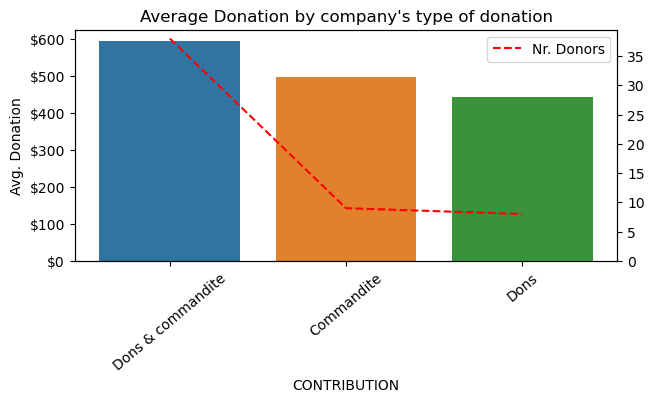

In [81]:
bar_line_plot(df1, y1='DOL_AMOUNT', y2='COUNT', x='CONTRIBUTION', y1_axis =  'Avg. Donation',
y2_axis = '', y2_label= 'Nr. Donors', title = "Average Donation by company's type of donation", 
legend=True)

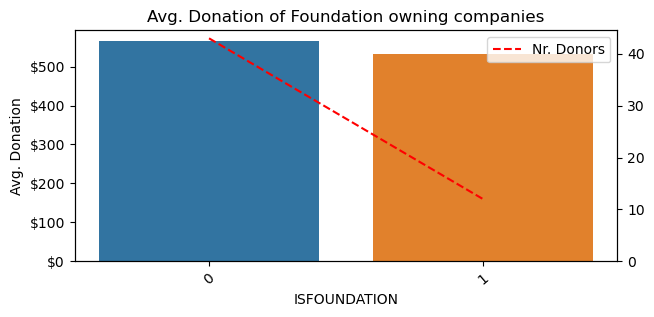

In [82]:
bar_line_plot(df1, y1='DOL_AMOUNT', y2='COUNT', x='ISFOUNDATION', y1_axis =  'Avg. Donation',
y2_axis = '', y2_label= 'Nr. Donors', title = 'Avg. Donation of Foundation owning companies', legend=True)

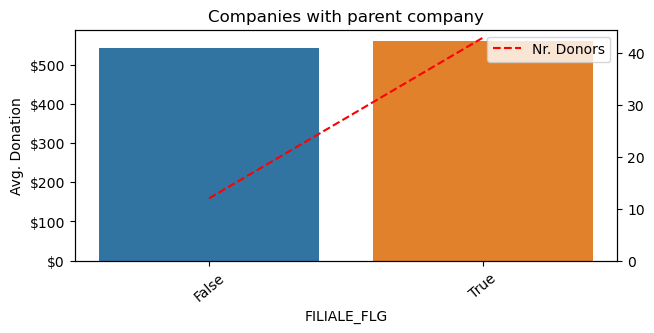

In [83]:
df1['FILIALE_FLG'] = df1.FILIALE_DE.isna()

bar_line_plot(df1, y1='DOL_AMOUNT', y2='COUNT', x='FILIALE_FLG', y1_axis =  'Avg. Donation',
y2_axis = '', y2_label= 'Nr. Donors', title = 'Companies with parent company', legend=True)

In [84]:
df1.LIMITES_GEOG = df1.LIMITES_GEOG.str.strip('.').astype(str)

mapper = { 'locales, régionales et nationales' :'regional and national',
'locales' : 'locals',
'nationales' : 'nationals',
'régionales' :'regionals',
'nationales, régionales au Québec' : 'regional and national',
'régionales et nationales' : 'regional and national',
'locales, régionales':'local and regional',
'locales et régionales':'local and regional',
'locales, nationales et internationales':'international',
'nan':'nan',
'nationales et internationales':'international'}

df1.LIMITES_GEOG = df1.LIMITES_GEOG.map(mapper)

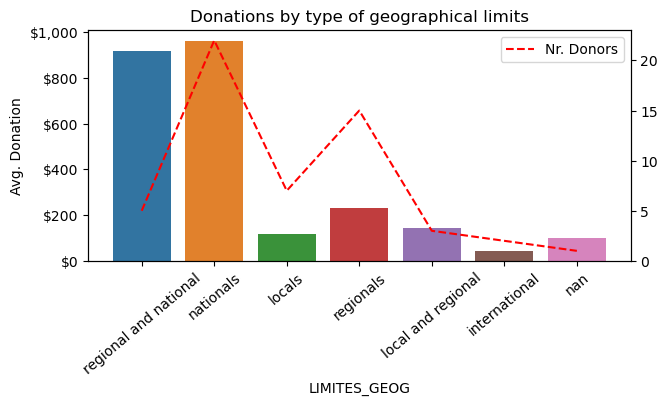

In [85]:
bar_line_plot(df1, y1='DOL_AMOUNT', y2='COUNT', x='LIMITES_GEOG', y1_axis =  'Avg. Donation',
y2_axis = '', y2_label= 'Nr. Donors', title = 'Donations by type of geographical limits', legend=True)

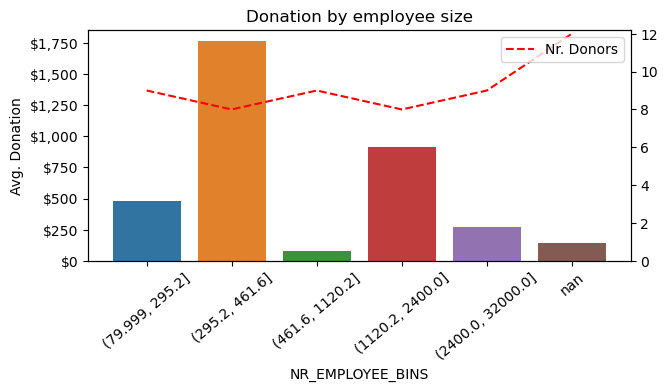

In [86]:
df1.NOMBRE_DEMPLOYES = df1.NOMBRE_DEMPLOYES.astype(str).str.replace(' ','').astype(float)
df1['NR_EMPLOYEE_BINS'], bins= pd.qcut(df1.NOMBRE_DEMPLOYES, q = 5, retbins=True)
df1 = df1.sort_values(['NR_EMPLOYEE_BINS'])
df1.NR_EMPLOYEE_BINS = df1.NR_EMPLOYEE_BINS.astype(str)

bar_line_plot(df1, y1='DOL_AMOUNT', y2='COUNT', x='NR_EMPLOYEE_BINS', y1_axis =  'Avg. Donation',
y2_axis = '', y2_label= 'Nr. Donors', title = 'Donation by employee size', legend=True)

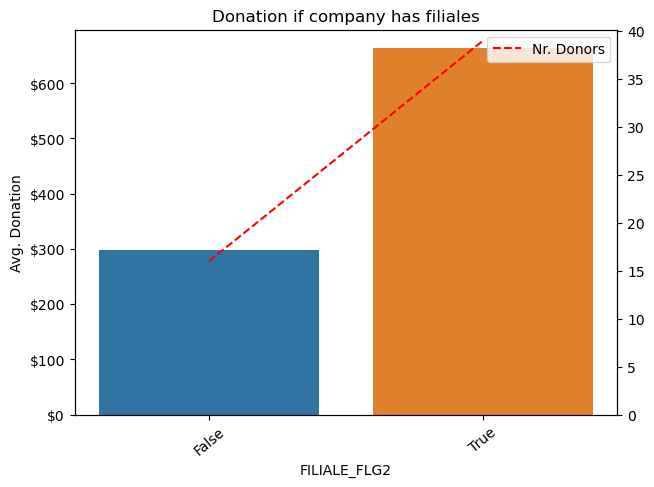

In [75]:
df1['FILIALE_FLG2'] = df1.PRINCIP_FILIALES.isna()

bar_line_plot(df1, y1='DOL_AMOUNT', y2='COUNT', x='FILIALE_FLG2', y1_axis =  'Avg. Donation',
y2_axis = '', y2_label= 'Nr. Donors', title = 'Donation if company has filiales', legend=True)

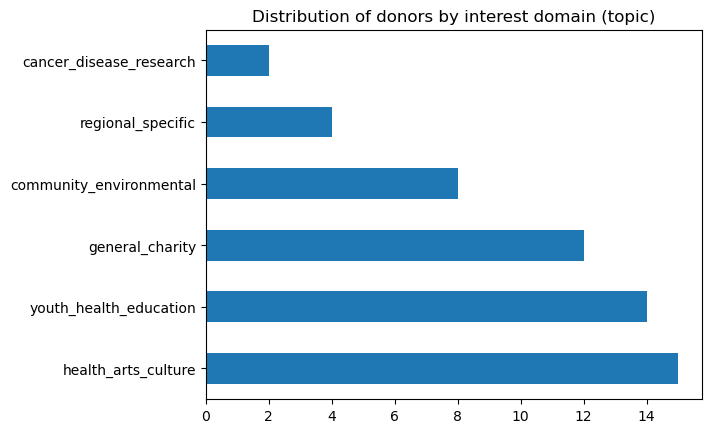

In [76]:
df1.MAIN_TOPIC.value_counts().plot(kind='barh', title='Distribution of donors by interest domain (topic)')
plt.show()

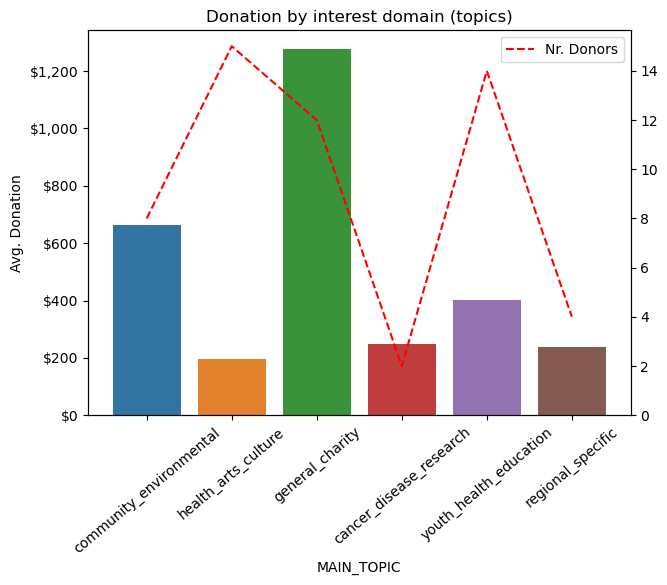

In [77]:
bar_line_plot(df1, y1='DOL_AMOUNT', y2='COUNT', x='MAIN_TOPIC', y1_axis =  'Avg. Donation',
y2_axis = '', y2_label= 'Nr. Donors', title = 'Donation by interest domain (topics)', legend=True)

In [18]:
df_topics = df.groupby(['COMPANY', 'MAIN_TOPIC', 'SECONDARY_TOPIC'])['DOL_AMOUNT'].sum().reset_index()
df_topics.sort_values('DOL_AMOUNT', ascending=False ).head(10)

,COMPANY,MAIN_TOPIC,SECONDARY_TOPIC,DOL_AMOUNT
15,CORBEC,general_charity,community_environmental,37400.0
16,CP,youth_health_education,general_charity,18000.0
19,DELMAR,community_environmental,health_arts_culture,14000.0
59,VIA,community_environmental,health_arts_culture,9702.0
14,CN,health_arts_culture,regional_specific,8794.0
60,WESTJET,youth_health_education,general_charity,4600.0
20,DELTA,youth_health_education,community_environmental,3000.0
57,ULTRAMAR,cancer_disease_research,health_arts_culture,2000.0
24,ENERGIE CARDIO,youth_health_education,community_environmental,1915.0
43,RBC,health_arts_culture,youth_health_education,1600.0


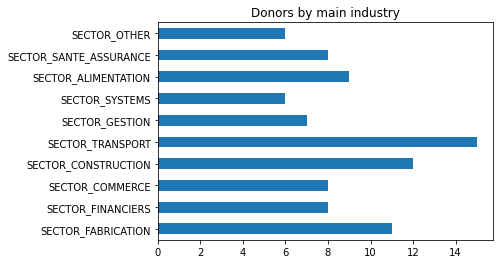

In [19]:
### Sector

df1[sector_list].sum().plot(kind = 'barh', title = 'Donors by main industry')
plt.show()

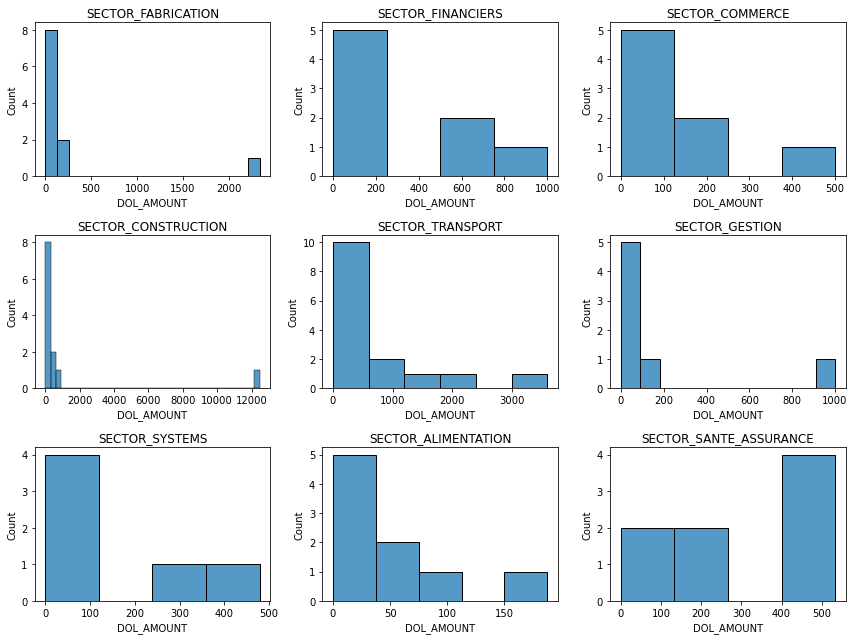

In [20]:
fig, ax = plt.subplots(3,3, figsize = (12,9))
s = sector_list

t = 0
for i in range(3):
    for j in range(3):
        sns.histplot(ax = ax[i][j], data=df1[df1[s[t]] == 1], x = 'DOL_AMOUNT')
        ax[i][j].set_title(s[t])
        t += 1

fig.tight_layout()
plt.show()
